In [1]:
# Import Librarirs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
# Create 2 new columns

df['MinsPerMatch'] = (df['Mins'] / df['Matches']).astype(int)
df['GoalsPerMatch'] = (df['Goals'] / df['Matches']).astype(float)
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88,0.000000
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,84,0.111111
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,74,0.031250


In [15]:
# Total Goals

Total_Goals = df['Goals'].sum()
print(Total_Goals)

986


In [17]:
# Penalty Goals

Total_PenaltyGoals = df['Penalty_Goals'].sum()
print(Total_PenaltyGoals)

102


In [19]:
# Penalty Attempts

Total_PenaltyAttempts = df['Penalty_Attempted'].sum()
print(Total_PenaltyAttempts)

125


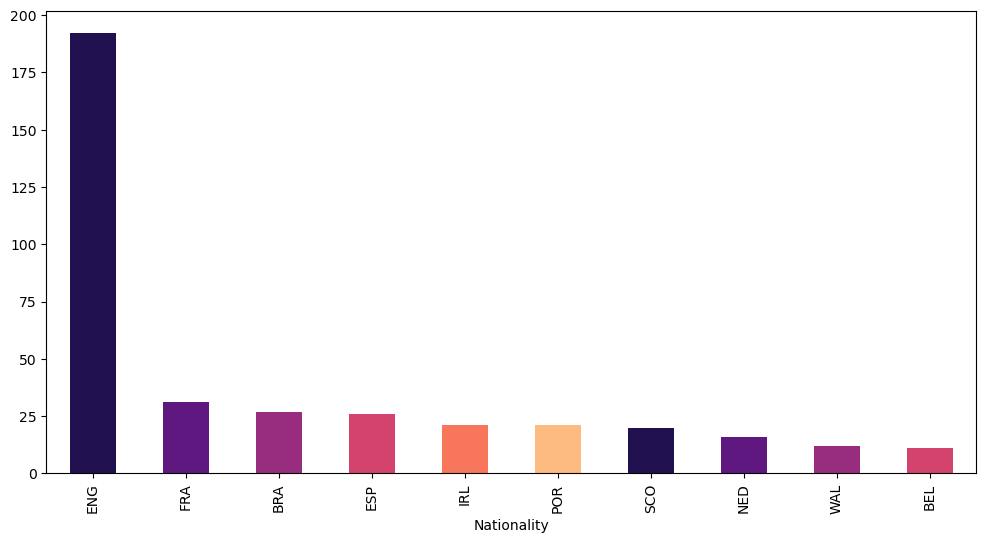

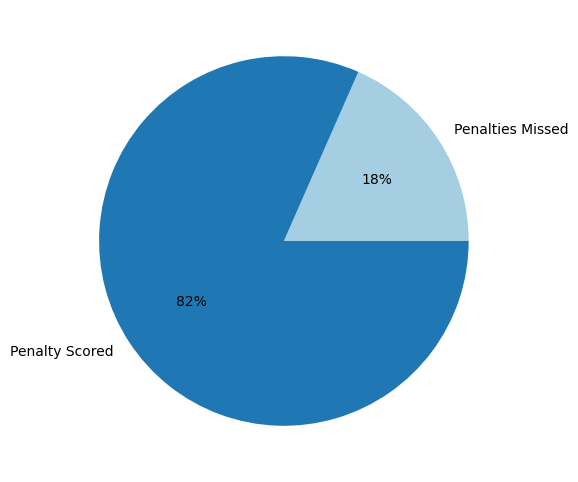

In [29]:
# Pie chart for penalties missed vs scored

plt.figure(figsize = (13, 6))
pl_not_scored = df['Penalty_Attempted'].sum() - Total_PenaltyGoals
data = [pl_not_scored, Total_PenaltyGoals]
labels = ['Penalties Missed', 'Penalty Scored']
color_palette = sns.color_palette("Paired")
plt.pie(data, labels = labels, colors = color_palette, autopct = '%.0f%%')
plt.show()

In [31]:
# Unique positions
df['Position'].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

In [33]:
# Total FW Players

df[df['Position'] == 'FW']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
16,Tammy Abraham,Chelsea,ENG,FW,22,22,12,1040,6,1,218,68.3,0,0,0.56,0.07,0,0,47,0.272727
19,Olivier Giroud,Chelsea,FRA,FW,33,17,8,748,4,0,217,74.2,0,0,0.58,0.09,1,0,44,0.235294
23,Ruben Loftus-Cheek,Chelsea,ENG,FW,24,1,1,60,0,0,16,68.8,0,0,0.00,0.00,0,0,60,0.000000
30,Raheem Sterling,Manchester City,ENG,FW,25,31,28,2536,10,7,1127,85.4,0,1,0.43,0.17,4,0,81,0.322581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Oliver Burke,Sheffield United,SCO,FW,23,25,14,1269,1,1,262,70.6,0,0,0.17,0.13,2,0,50,0.040000
518,Oliver McBurnie,Sheffield United,SCO,FW,24,23,12,1324,1,0,426,62.9,0,0,0.21,0.07,2,0,57,0.043478
519,Rhian Brewster,Sheffield United,ENG,FW,20,27,12,1128,0,0,225,69.3,0,0,0.14,0.13,1,0,41,0.000000
523,Billy Sharp,Sheffield United,ENG,FW,34,16,7,735,3,0,123,69.9,2,2,0.33,0.07,1,0,45,0.187500


In [35]:
# Players from different nations

np.size((df['Nationality'].unique()))

59

In [37]:
# Most players from which countries

nationality = df.groupby('Nationality').size().sort_values(ascending = False)
nationality.head(10).plot(kind = 'bar', figsize = (12, 6), color = sns.color_palette('magma'))

<Axes: xlabel='Nationality'>

In [39]:
# Clubs with maximum players in their squad

df['Club'].value_counts().nlargest(5).plot(kind = 'bar', color = sns.color_palette("viridis"))

<Axes: xlabel='Club'>

In [41]:
# Clubs with latest players in their squad

df['Club'].value_counts().nsmallest(5).plot(kind = 'bar', color = sns.color_palette("viridis"))

<Axes: xlabel='Club'>

In [47]:
# Players based on age group

Under20 = df[df['Age'] <= 20]
age20_25 = df[(df['Age'] > 20) & (df['Age'] <= 25)]
age25_30 = df[(df['Age'] > 25) & (df['Age'] <= 30)]
Above30 = df[df['Age'] > 30]

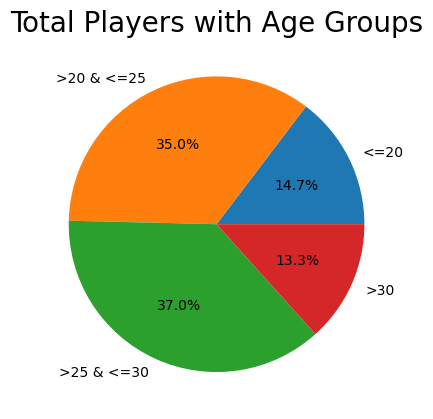

In [51]:
# Assuming the following DataFrame exist: Under20, age20_25, age25_30 and Above30

x = np.array([Under20['Name'].count(),age20_25['Name'].count(),age25_30['Name'].count(),Above30['Name'].count()])
mylabels = ["<=20", ">20 & <=25", ">25 & <=30", ">30"]
plt.title('Total Players with Age Groups', fontsize=20)
plt.pie(x, labels=mylabels, autopct = "%.1f%%")
plt.show()

In [53]:
# Total under 20 players in each club

players_under_20 = df[df['Age'] < 20]
players_under_20['Club'].value_counts().plot(kind = 'bar', color = sns.color_palette("cubehelix"))

<Axes: xlabel='Club'>

In [55]:
# Under 20 players in Manu

players_under_20[players_under_20["Club"] == 'Manchester United']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
61,Mason Greenwood,Manchester United,ENG,FW,18,31,21,1822,7,2,732,83.1,0,0,0.37,0.09,2,0,58,0.225806
72,Brandon Williams,Manchester United,ENG,DF,19,4,2,188,0,0,140,85.7,0,0,0.05,0.01,0,0,47,0.000000
73,Amad Diallo,Manchester United,CIV,FW,18,3,2,166,0,1,64,84.4,0,0,0.02,0.26,0,0,55,0.000000
74,Anthony Elanga,Manchester United,SWE,FW,18,2,2,155,1,0,53,81.1,0,0,0.16,0.02,0,0,77,0.500000
76,Shola Shoretire,Manchester United,ENG,FW,16,2,0,11,0,0,8,75.0,0,0,0.00,0.00,0,0,5,0.000000
78,Hannibal Mejbri,Manchester United,FRA,MF,17,1,0,9,0,0,3,100.0,0,0,0.00,0.00,0,0,9,0.000000
79,William Thomas Fish,Manchester United,ENG,DF,17,1,0,1,0,0,1,0.0,0,0,0.00,0.00,0,0,1,0.000000


In [57]:
# Under 20 players in Chelsea

players_under_20[players_under_20["Club"] == 'Chelsea']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
18,Callum Hudson-Odoi,Chelsea,ENG,"FW,DF",19,23,10,1059,2,3,659,82.2,0,0,0.12,0.26,0,0,46,0.086957
21,Billy Gilmour,Chelsea,SCO,MF,19,5,3,261,0,0,215,89.3,0,0,0.01,0.04,0,0,52,0.000000


In [59]:
# Average age of players in each club

plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Club', y = 'Age', data = df)
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Chelsea'),
  Text(1, 0, 'Manchester City'),
  Text(2, 0, 'Manchester United'),
  Text(3, 0, 'Liverpool FC'),
  Text(4, 0, 'Leicester City'),
  Text(5, 0, 'West Ham United'),
  Text(6, 0, 'Tottenham Hotspur'),
  Text(7, 0, 'Arsenal'),
  Text(8, 0, 'Leeds United'),
  Text(9, 0, 'Everton'),
  Text(10, 0, 'Aston Villa'),
  Text(11, 0, 'Newcastle United'),
  Text(12, 0, 'Wolverhampton Wanderers'),
  Text(13, 0, 'Crystal Palace'),
  Text(14, 0, 'Southampton'),
  Text(15, 0, 'Brighton'),
  Text(16, 0, 'Burnley'),
  Text(17, 0, 'Fulham'),
  Text(18, 0, 'West Bromwich Albion'),
  Text(19, 0, 'Sheffield United')])

In [61]:
# Group the English Premier League DataFrame (epl_df) by club and count the number of players in each club

num_player = df.groupby('Club').size()
data = (df.groupby('Club')['Age'].sum()) / num_player
data.sort_values(ascending = False)

Club
Crystal Palace             28.333333
West Ham United            27.500000
Burnley                    27.040000
West Bromwich Albion       26.766667
Newcastle United           26.074074
Manchester City            25.708333
Tottenham Hotspur          25.625000
Chelsea                    25.592593
Leicester City             25.592593
Liverpool FC               25.571429
Everton                    25.413793
Leeds United               25.347826
Fulham                     25.035714
Arsenal                    24.965517
Sheffield United           24.814815
Brighton                   24.555556
Wolverhampton Wanderers    24.444444
Aston Villa                24.291667
Southampton                24.137931
Manchester United          23.862069
dtype: float64

In [73]:
# Total assists from each club

Assits_by_club = pd.DataFrame(df.groupby('Club', as_index = False)['Assists'].sum())
sns.set_theme(style = "whitegrid", color_codes = True)
ax = sns.barplot(x = 'Club', y = 'Assists', data = Assits_by_club.sort_values(by = 'Assists'))
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Assists", fontsize = 20)
plt.xticks(rotation = 75)
plt.rcParams["figure.figsize"] = (20, 8)
plt.title('Plot of Club vs Total Assists', fontsize = 20)

Text(0.5, 1.0, 'Plot of Club vs Total Assists')

In [75]:
# Top 10 Assists

top_10_assists = df[['Name', 'Club', 'Assists', 'Matches']].nlargest(n = 10, columns = 'Assists')
top_10_assists

,Name,Club,Assists,Matches
162,Harry Kane,Tottenham Hotspur,14,35
34,Kevin De Bruyne,Manchester City,12,25
51,Bruno Fernandes,Manchester United,12,37
161,Son Heung-min,Tottenham Hotspur,10,37
273,Jack Grealish,Aston Villa,10,26
54,Marcus Rashford,Manchester United,9,37
110,Jamie Vardy,Leicester City,9,34
220,Raphael Dias Belloli,Leeds United,9,30
2,Timo Werner,Chelsea,8,35
136,Aaron Cresswell,West Ham United,8,36


In [81]:
# Creating a DataFrame to group the total goals scored by each club

Goals_by_clubs = pd.DataFrame(df.groupby('Club', as_index = False)['Goals'].sum())
sns.set_theme(style ="whitegrid", color_codes = True)
ax = sns.barplot(x = 'Club', y = 'Goals', data = Goals_by_clubs.sort_values(by ="Goals"), palette = 'rocket', hue = 'Club')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Goals", fontsize = 20)
plt.xticks(rotation =75)
plt.rcParams["figure.figsize"] = (20, 8)
plt.title('Plot of Club vs Total Goals', fontsize = 20)

Text(0.5, 1.0, 'Plot of Club vs Total Goals')

In [83]:
# Most goals by players

top_10_goals = df[['Name', 'Club', 'Goals', 'Matches']].nlargest(n = 10, columns = 'Goals')
top_10_goals

,Name,Club,Goals,Matches
162,Harry Kane,Tottenham Hotspur,23,35
81,Mohamed Salah,Liverpool FC,22,37
51,Bruno Fernandes,Manchester United,18,37
161,Son Heung-min,Tottenham Hotspur,17,37
214,Patrick Bamford,Leeds United,17,38
237,Dominic Calvert-Lewin,Everton,16,33
110,Jamie Vardy,Leicester City,15,34
267,Ollie Watkins,Aston Villa,14,37
33,İlkay Gündoğan,Manchester City,13,28
191,Alexandre Lacazette,Arsenal,13,31


In [85]:
# Goals per match

top_10_goals_per_match = df[['Name', 'GoalsPerMatch', 'Matches', 'Goals']].nlargest(n = 10, columns = 'GoalsPerMatch')
top_10_goals_per_match

,Name,GoalsPerMatch,Matches,Goals
162,Harry Kane,0.657143,35,23
81,Mohamed Salah,0.594595,37,22
307,Joe Willock,0.571429,14,8
145,Jesse Lingard,0.562500,16,9
175,Gareth Bale,0.550000,20,11
74,Anthony Elanga,0.500000,2,1
51,Bruno Fernandes,0.486486,37,18
237,Dominic Calvert-Lewin,0.484848,33,16
120,Kelechi Iheanacho,0.480000,25,12
92,Diogo Jota,0.473684,19,9


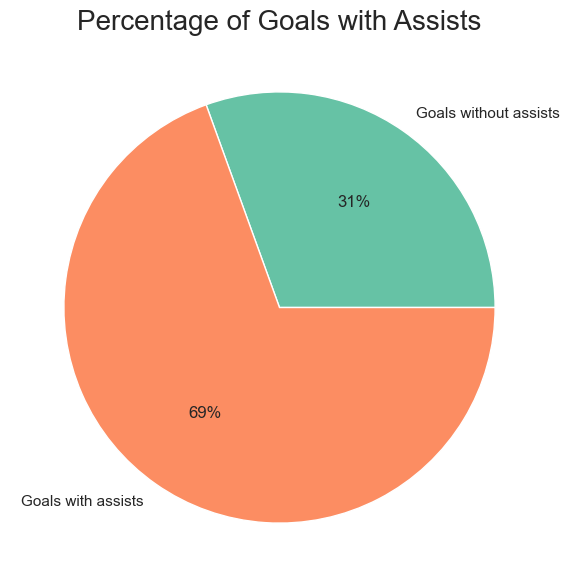

In [89]:
# Pie Chart - Goals with assist and without assist

plt.figure(figsize = (14, 7))
assists = df['Assists'].sum()
data = [Total_Goals - assists, assists]
labels = ['Goals without assists', 'Goals with assists']
color = sns.color_palette('Set2')
plt.pie(data, labels = labels, colors = color, autopct ='%.0f%%')
plt.title('Percentage of Goals with Assists', fontsize = 20)
plt.show()

/var/folders/18/dpnmnwsj0nz74sltb7rw_9380000gn/T/ipykernel_1937/2198324072.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  c.set_xticklabels(c.get_xticklabels(), rotation = 45)


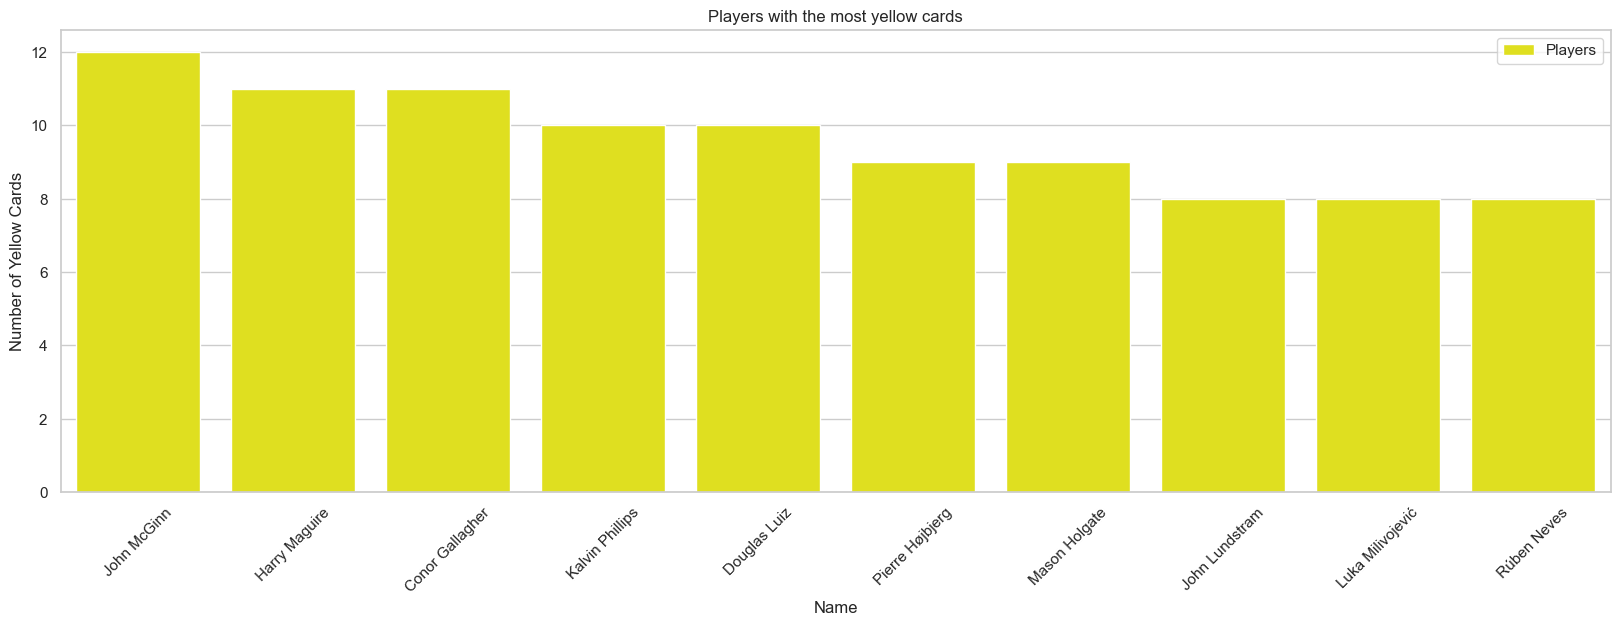

In [91]:
# Top 10 players with most yellow cards

yellow = df.sort_values(by = 'Yellow_Cards', ascending = False)[:10]
plt.figure(figsize = (20, 6))
plt.title("Players with the most yellow cards")
c = sns.barplot(x = yellow['Name'], y = yellow['Yellow_Cards'], label = 'Players', color ='yellow')
plt.ylabel('Number of Yellow Cards')
c.set_xticklabels(c.get_xticklabels(), rotation = 45)
plt.show()

Categorical Columns: Index(['Name', 'Club', 'Nationality', 'Position'], dtype='object')

Unique values in 'Name':
 ['Mason Mount' 'Edouard Mendy' 'Timo Werner' 'Ben Chilwell' 'Reece James'
 'César Azpilicueta' "N'Golo Kanté" 'Jorginho' 'Thiago Silva' 'Kurt Zouma'
 'Mateo Kovačić' 'Antonio Rüdiger' 'Christian Pulisic' 'Kai Havertz'
 'Andreas Christensen' 'Hakim Ziyech' 'Tammy Abraham' 'Marcos Alonso'
 'Callum Hudson-Odoi' 'Olivier Giroud' 'Kepa Arrizabalaga' 'Billy Gilmour'
 'Willy Caballero' 'Ruben Loftus-Cheek' 'Emerson Palmieri' 'Fikayo Tomori'
 'Ross Barkley' 'Ederson' 'Rúben Dias' 'Rodri' 'Raheem Sterling'
 'João Cancelo' 'Bernardo Silva' 'İlkay Gündoğan' 'Kevin De Bruyne'
 'Riyad Mahrez' 'Gabriel Jesus' 'Kyle Walker' 'John Stones' 'Phil Foden'
 'Oleksandr Zinchenko' 'Ferrán Torres' 'Aymeric Laporte' 'Fernandinho'
 'Benjamin Mendy' 'Nathan Aké' 'Sergio Agüero' 'Eric García'
 'Scott Carson' 'Zack Steffen' 'Liam Delap' 'Bruno Fernandes'
 'Aaron Wan-Bissaka' 'Harry Maguire' 'Marcus Ra

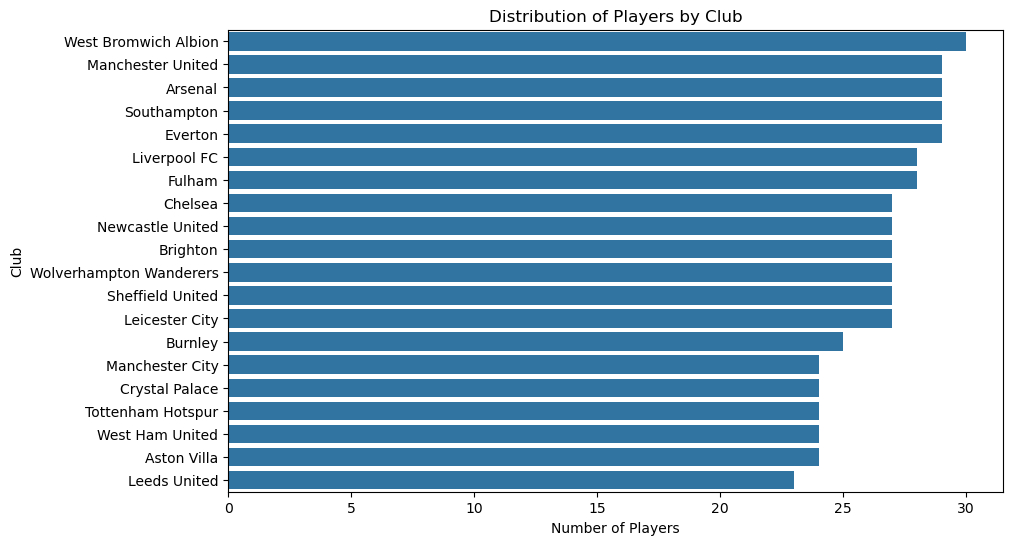

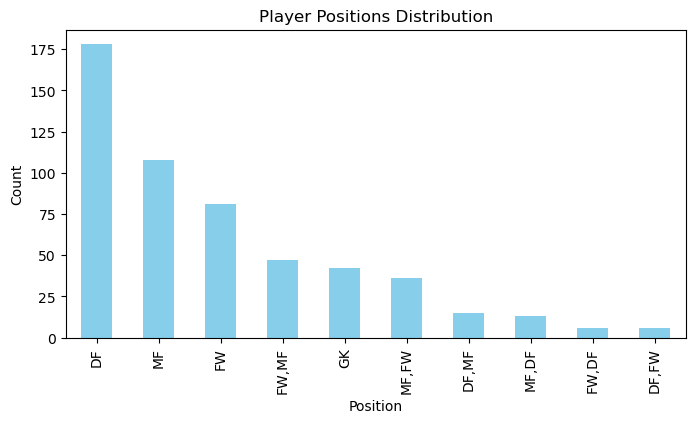

In [7]:
# Identify categorical features
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

# Display unique values in each categorical column
for col in categorical_columns:
    print(f"\nUnique values in '{col}':\n", df[col].unique())

# Value counts for each categorical column
for col in categorical_columns:
    print(f"\nValue counts for '{col}':\n", df[col].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(y='Club', data=df, order=df['Club'].value_counts().index)
plt.title("Distribution of Players by Club")
plt.xlabel("Number of Players")
plt.ylabel("Club")
plt.show()

# Example: Analyze 'Position' distribution
plt.figure(figsize=(8, 4))
df['Position'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Player Positions Distribution")
plt.xlabel("Position")
plt.ylabel("Count")
plt.show()

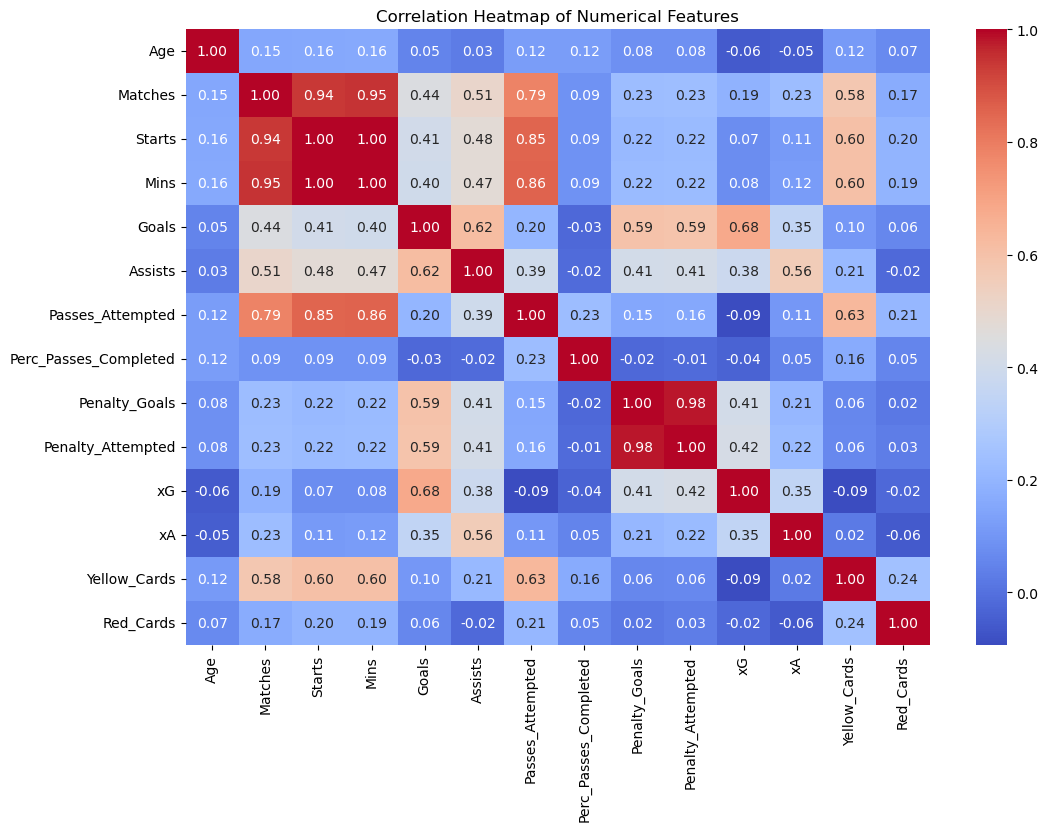

In [14]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

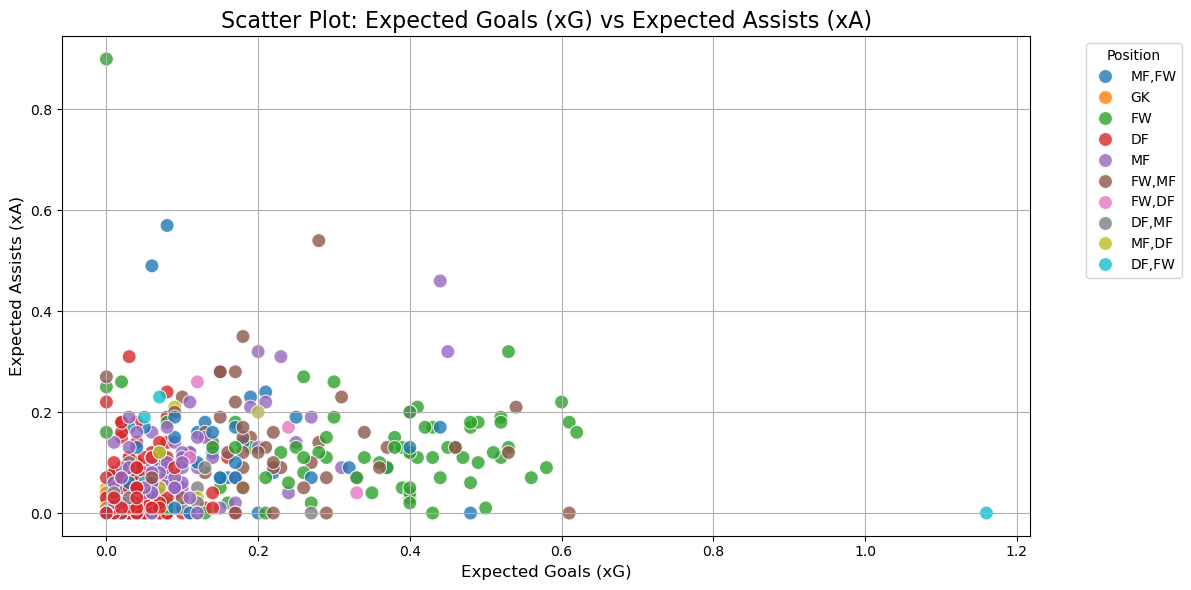

In [7]:
# Scatter plot for xG and xA
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['xG'], y=df['xA'], hue=df['Position'], palette='tab10', s=100, alpha=0.8)

plt.title('Scatter Plot: Expected Goals (xG) vs Expected Assists (xA)', fontsize=16)
plt.xlabel('Expected Goals (xG)', fontsize=12)
plt.ylabel('Expected Assists (xA)', fontsize=12)
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

In [9]:
df

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,Lys Mousset,Sheffield United,FRA,"FW,MF",24,11,2,296,0,0,50,80.0,0,0,0.22,0.10,0,0
528,Jack O'Connell,Sheffield United,ENG,DF,26,2,2,180,0,0,77,77.9,0,0,0.00,0.00,0,0
529,Iliman Ndiaye,Sheffield United,FRA,MF,21,1,0,12,0,0,3,100.0,0,0,0.00,0.00,0,0
530,Antwoine Hackford,Sheffield United,ENG,"DF,FW",16,1,0,11,0,0,1,100.0,0,0,1.16,0.00,0,0


In [7]:
df.to_csv("newdata.csv",index=False)


Missing values in numerical columns:
Goals                    0
Assists                  0
xG                       0
xA                       0
Mins                     0
Passes_Attempted         0
Perc_Passes_Completed    0
dtype: int64

Min-Max Scaled Metrics (First 5 Rows):
      Goals   Assists        xG        xA      Mins  Passes_Attempted  \
0  0.260870  0.357143  0.181034  0.266667  0.844984          0.585252   
1  0.000000  0.000000  0.000000  0.000000  0.802574          0.313317   
2  0.260870  0.571429  0.353448  0.233333  0.760749          0.257001   
3  0.130435  0.357143  0.086207  0.122222  0.668324          0.561917   
4  0.043478  0.142857  0.051724  0.133333  0.693770          0.618233   

   Perc_Passes_Completed  
0               0.824752  
1               0.847525  
2               0.774257  
3               0.788119  
4               0.851485  

Z-Score Standardized Metrics (First 5 Rows):
      Goals   Assists        xG        xA      Mins  Passes_Attempted  \


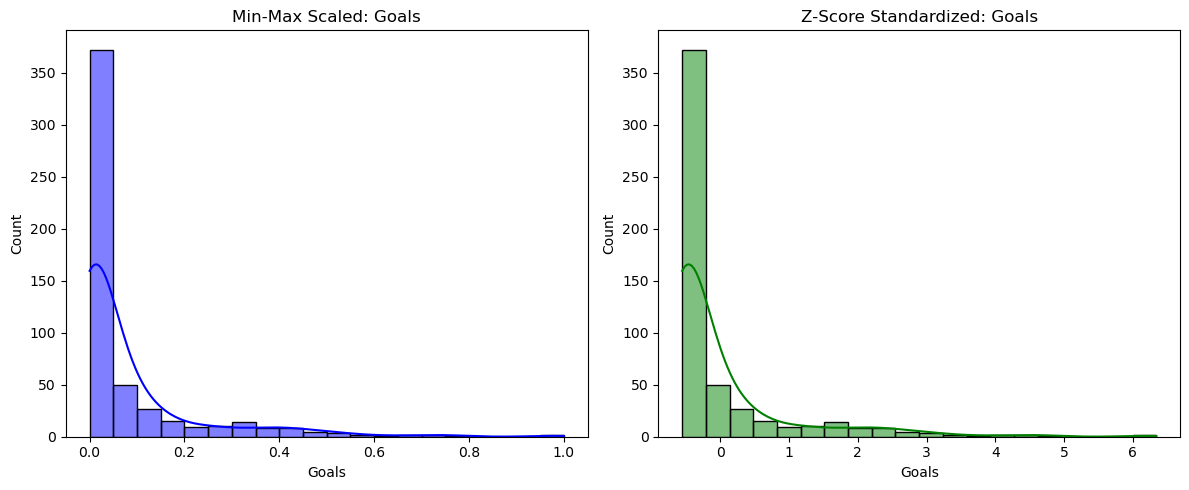

In [11]:
# Import necessary libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select numerical columns for normalization
numerical_columns = ['Goals', 'Assists', 'xG', 'xA', 'Mins', 'Passes_Attempted', 'Perc_Passes_Completed']

# Check for missing values in numerical columns
print("\nMissing values in numerical columns:")
print(df[numerical_columns].isnull().sum())

# Fill missing values if necessary (e.g., with 0 or column mean)
# Example: df[numerical_columns] = df[numerical_columns].fillna(0)

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])

print("\nMin-Max Scaled Metrics (First 5 Rows):")
print(df_minmax_scaled[numerical_columns].head())

# Z-Score Standardization
z_score_scaler = StandardScaler()
df_zscore_scaled = df.copy()
df_zscore_scaled[numerical_columns] = z_score_scaler.fit_transform(df[numerical_columns])

print("\nZ-Score Standardized Metrics (First 5 Rows):")
print(df_zscore_scaled[numerical_columns].head())

# Visualization of normalized metrics (example: Goals distribution)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_minmax_scaled['Goals'], kde=True, color='blue', bins=20)
plt.title("Min-Max Scaled: Goals")

plt.subplot(1, 2, 2)
sns.histplot(df_zscore_scaled['Goals'], kde=True, color='green', bins=20)
plt.title("Z-Score Standardized: Goals")

plt.tight_layout()
plt.show()



Dataset with Derived Features (First 5 Rows):
   Goals_per_90  Assists_per_90  xG_Efficiency
0      0.186851        0.155709      28.571429
1      0.000000        0.000000            NaN
2      0.207533        0.276710      14.634146
3      0.118110        0.196850      30.000000
4      0.037927        0.075853      16.666667


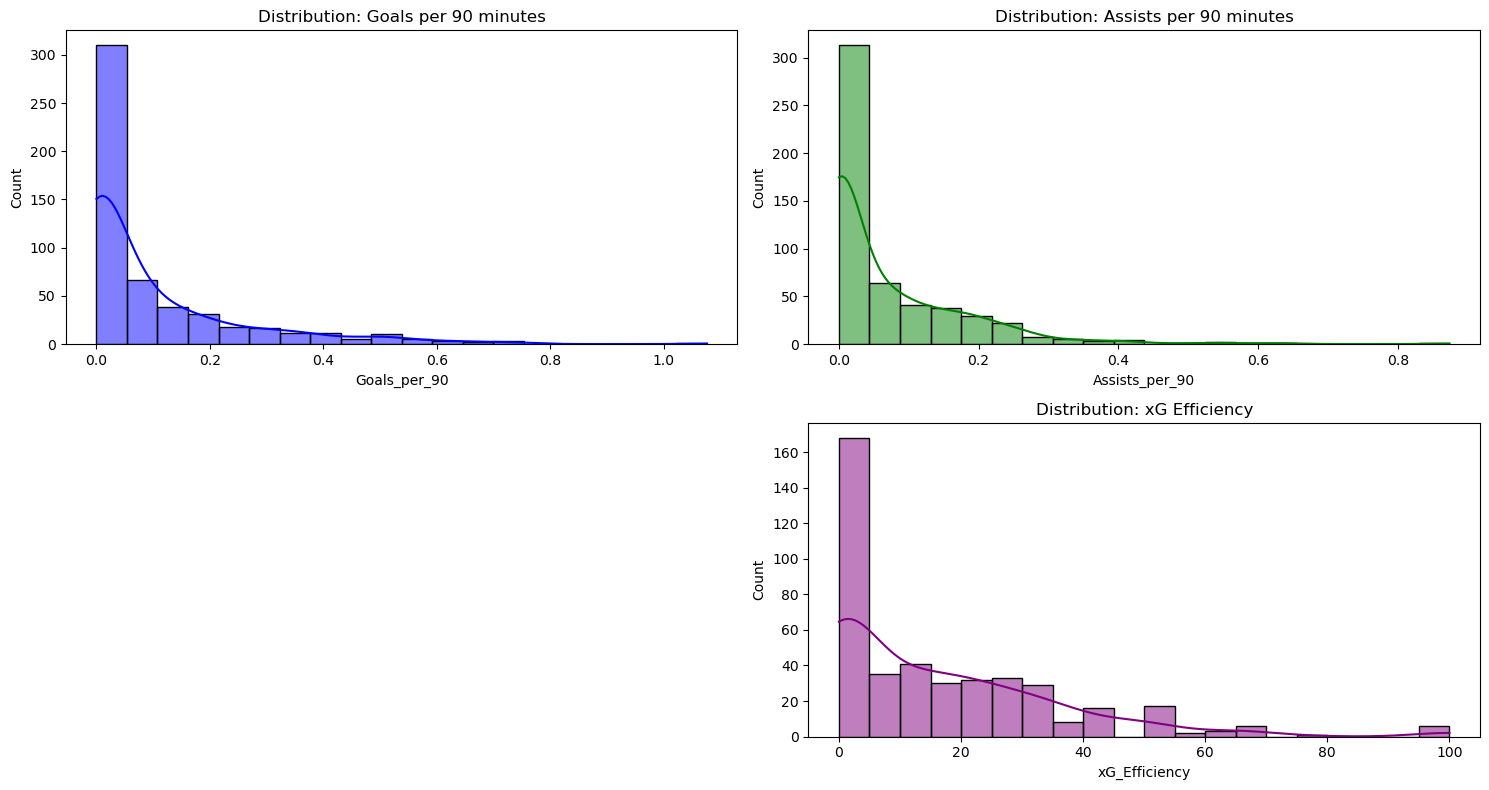

In [13]:
# Check if necessary columns are available in the dataset
required_columns = ['Goals', 'Assists', 'Mins', 'xG']
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"Dataset is missing one or more required columns: {required_columns}")

# Add derived features to the dataset
# Goals per 90 minutes
df['Goals_per_90'] = (df['Goals'] / df['Mins']) * 90

# Assists per 90 minutes
df['Assists_per_90'] = (df['Assists'] / df['Mins']) * 90

# xG Efficiency
df['xG_Efficiency'] = df['Goals'] / df['xG']

# Display first few rows of the updated dataset
print("\nDataset with Derived Features (First 5 Rows):")
print(df[['Goals_per_90', 'Assists_per_90',  'xG_Efficiency']].head())

# Visualization: Distribution of Derived Features
plt.figure(figsize=(15, 8))

# Goals per 90
plt.subplot(2, 2, 1)
sns.histplot(df['Goals_per_90'], kde=True, bins=20, color='blue')
plt.title("Distribution: Goals per 90 minutes")

# Assists per 90
plt.subplot(2, 2, 2)
sns.histplot(df['Assists_per_90'], kde=True, bins=20, color='green')
plt.title("Distribution: Assists per 90 minutes")

# Cost Efficiency (if calculated)
#if 'Cost_Efficiency' in df.columns:
   # plt.subplot(2, 2, 3)
    #sns.histplot(df['Cost_Efficiency'], kde=True, bins=20, color='orange')
    #plt.title("Distribution: Cost Efficiency")

# xG Efficiency
plt.subplot(2, 2, 4)
sns.histplot(df['xG_Efficiency'], kde=True, bins=20, color='purple')
plt.title("Distribution: xG Efficiency")

plt.tight_layout()
plt.show()


In [15]:
df

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,...,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Goals_per_90,Assists_per_90,xG_Efficiency
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,...,82.3,1,1,0.21,0.24,2,0,0.186851,0.155709,28.571429
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,...,84.6,0,0,0.00,0.00,2,0,0.000000,0.000000,NaN
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,...,77.2,0,0,0.41,0.21,2,0,0.207533,0.276710,14.634146
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,...,78.6,0,0,0.10,0.11,3,0,0.118110,0.196850,30.000000
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,...,85.0,0,0,0.06,0.12,3,0,0.037927,0.075853,16.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,Lys Mousset,Sheffield United,FRA,"FW,MF",24,11,2,296,0,0,...,80.0,0,0,0.22,0.10,0,0,0.000000,0.000000,0.000000
528,Jack O'Connell,Sheffield United,ENG,DF,26,2,2,180,0,0,...,77.9,0,0,0.00,0.00,0,0,0.000000,0.000000,NaN
529,Iliman Ndiaye,Sheffield United,FRA,MF,21,1,0,12,0,0,...,100.0,0,0,0.00,0.00,0,0,0.000000,0.000000,NaN
530,Antwoine Hackford,Sheffield United,ENG,"DF,FW",16,1,0,11,0,0,...,100.0,0,0,1.16,0.00,0,0,0.000000,0.000000,0.000000


In [17]:
df.isna().sum()

Name                       0
Club                       0
Nationality                0
Position                   0
Age                        0
Matches                    0
Starts                     0
Mins                       0
Goals                      0
Assists                    0
Passes_Attempted           0
Perc_Passes_Completed      0
Penalty_Goals              0
Penalty_Attempted          0
xG                         0
xA                         0
Yellow_Cards               0
Red_Cards                  0
Goals_per_90               0
Assists_per_90             0
xG_Efficiency            104
dtype: int64

In [19]:
df.dropna(axis=0, how='any', subset=None, inplace=True)

In [21]:
df.isna().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
Goals_per_90             0
Assists_per_90           0
xG_Efficiency            0
dtype: int64

In [23]:
df

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,...,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Goals_per_90,Assists_per_90,xG_Efficiency
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,...,82.3,1,1,0.21,0.24,2,0,0.186851,0.155709,28.571429
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,...,77.2,0,0,0.41,0.21,2,0,0.207533,0.276710,14.634146
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,...,78.6,0,0,0.10,0.11,3,0,0.118110,0.196850,30.000000
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,...,85.0,0,0,0.06,0.12,3,0,0.037927,0.075853,16.666667
5,César Azpilicueta,Chelsea,ESP,DF,30,26,24,2188,1,2,...,87.5,0,0,0.03,0.11,5,1,0.041133,0.082267,33.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,Billy Sharp,Sheffield United,ENG,FW,34,16,7,735,3,0,...,69.9,2,2,0.33,0.07,1,0,0.367347,0.000000,9.090909
524,Max Lowe,Sheffield United,ENG,DF,23,8,7,550,0,0,...,65.0,0,0,0.01,0.03,1,0,0.000000,0.000000,0.000000
526,Daniel Jebbison,Sheffield United,ENG,FW,17,4,3,284,1,0,...,70.6,0,0,0.50,0.01,0,0,0.316901,0.000000,2.000000
527,Lys Mousset,Sheffield United,FRA,"FW,MF",24,11,2,296,0,0,...,80.0,0,0,0.22,0.10,0,0,0.000000,0.000000,0.000000


In [1]:
# Import Librarirs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
df1 = pd.read_csv(r"/Users/shanes/Desktop/Research/DataAnalysis/JupyterNotebook/new_data2.csv")
df1

NameError: name 'pd' is not defined

In [57]:
# Round off all float64 columns to 2 decimal places
df1 = df1.round({col: 2 for col in df.select_dtypes(include=['float64']).columns})

# Display the first few rows of the updated DataFrame
df1.head()

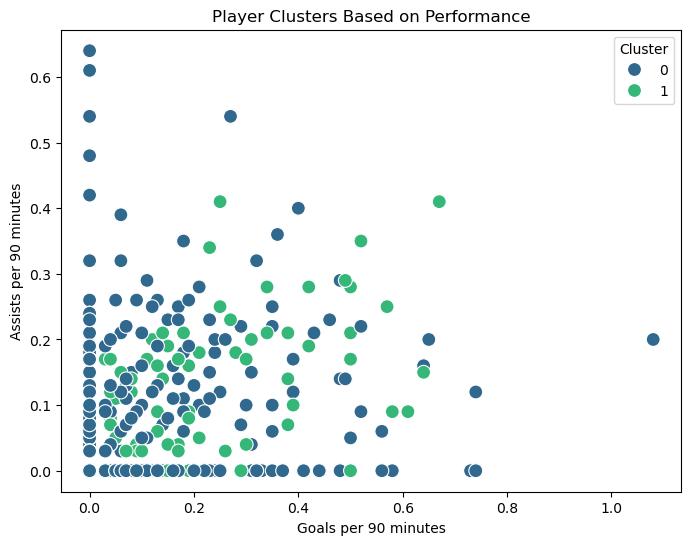

                  Name  Cluster
0          Mason Mount        1
1          Timo Werner        0
2         Ben Chilwell        1
3          Reece James        0
4    César Azpilicueta        1
..                 ...      ...
423        Billy Sharp        0
424           Max Lowe        0
425    Daniel Jebbison        0
426        Lys Mousset        0
427  Antwoine Hackford        0

[428 rows x 2 columns]


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Features for clustering
features = df1[['Goals_per_90', 'Assists_per_90', 'xG_Efficiency']]

# Standardize features
scaler = StandardScaler()
#scaled_features = scaler.fit_transform(features)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df1['Cluster'] = kmeans.fit_predict(features)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df1['Goals_per_90'],
    y=df1['Assists_per_90'],
    hue=df1['Cluster'],
    palette='viridis',
    s=100
)
plt.title("Player Clusters Based on Performance")
plt.xlabel("Goals per 90 minutes")
plt.ylabel("Assists per 90 minutes")
plt.legend(title="Cluster")
plt.show()

# Print cluster assignments
print(df1[['Name', 'Cluster']])


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Example dataset with player types
#df1['Type'] = ['Striker', 'Striker', 'Midfielder', 'Striker']  # Example labels

# Define features and target
X = df1[['Age', 'Matches', 'Starts', 'Mins', 'Goals','Assists', 'Passes_Attempted', 
         'Perc_Passes_Completed','Penalty_Goals', 'Penalty_Attempted',
         'xG', 'xA', 'Yellow_Cards', 'Goals_per_90', 'Assists_per_90', 'xG_Efficiency']]
y = df1['Position']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          DF       0.64      0.92      0.75        25
       DF,MF       0.00      0.00      0.00         2
          FW       0.73      0.79      0.76        14
       FW,DF       0.00      0.00      0.00         3
       FW,MF       0.17      0.50      0.25         4
          MF       0.43      0.43      0.43        21
       MF,DF       0.00      0.00      0.00         6
       MF,FW       0.00      0.00      0.00        11

    accuracy                           0.52        86
   macro avg       0.25      0.33      0.27        86
weighted avg       0.42      0.52      0.46        86



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 4.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [19]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(XGBClassifier(y_test, y_pred))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6 7 8 9], got ['DF' 'DF,FW' 'DF,MF' 'FW' 'FW,DF' 'FW,MF' 'GK' 'MF' 'MF,DF' 'MF,FW']

In [11]:
from sklearn.svm import SVC  # Import the Support Vector Classifier
from sklearn.metrics import classification_report  # For evaluation

# Initialize the SVM classifier
model = SVC(kernel='linear', random_state=42)  # You can change the kernel type as needed

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Print classification report (similar to your evaluation step)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          DF       0.68      0.76      0.72        25
       DF,MF       0.00      0.00      0.00         2
          FW       0.69      0.79      0.73        14
       FW,DF       0.00      0.00      0.00         3
       FW,MF       0.22      0.50      0.31         4
          MF       0.41      0.57      0.48        21
       MF,DF       0.00      0.00      0.00         6
       MF,FW       0.00      0.00      0.00        11

    accuracy                           0.51        86
   macro avg       0.25      0.33      0.28        86
weighted avg       0.42      0.51      0.46        86



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Cluster labels: [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  2 -1 -1  0  3  0  4  0  5  0  0  6  3 -1  0  0 -1  7  0 -1  8  0
  0  0  0  0  0 -1  0  0  0  0 -1  0  0 -1 -1  0  0 -1  0  0  0  0  0  0
  0  0  0  0  9  0  0  0  0  0 -1  0  0  0 10  0  6  4  0  0  0  0 11  0
  0  0  0 -1  0  0  0  0  0  0  0  0 12  0  0  0 -1  0  0  0  0 11  1 13
  0 13  3 -1  0  0  0  0  0  0  0  7 -1 -1  0  6  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0  0  8  0  0  2  0  0  0  0  0  2 -1  0
  0  0 -1  0 -1  0  0 -1  0 13 -1  0  3  0 -1  0  0  0  5  0  0  0 -1  0
  0  1  0 -1  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  8  0
  0  0  0  0  0 -1  0 -1  0  0  0  0  0 10 -1  0  0  0  0  0 13  0  0  0
  0  0  0  0  0  0  0  3  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1 -1  0  0  0  2  0  0  1  0
  0  0  0  0  0  0  0  0 -1  0  0 11  0  0  0 13  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  1  0  0  0  

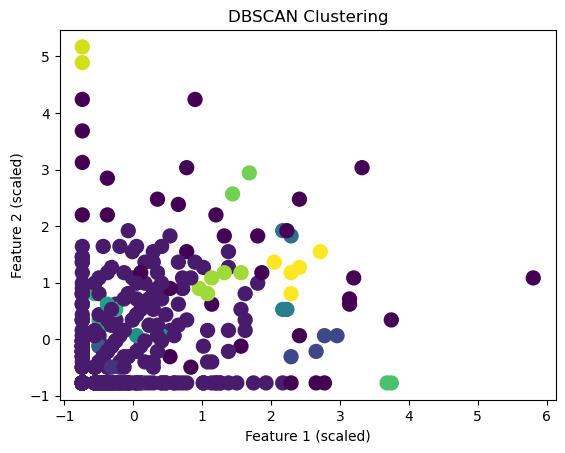

In [13]:
#dbscan 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Standardize features for better performance (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Initialize DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)  # Adjust eps and min_samples based on your data

# Fit the model
dbscan.fit(X_scaled)

# Get cluster labels
labels = dbscan.labels_

# Print cluster labels (-1 indicates noise/outliers)
print("Cluster labels:", labels)

# Visualize clusters (for 2D data only)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=100)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()

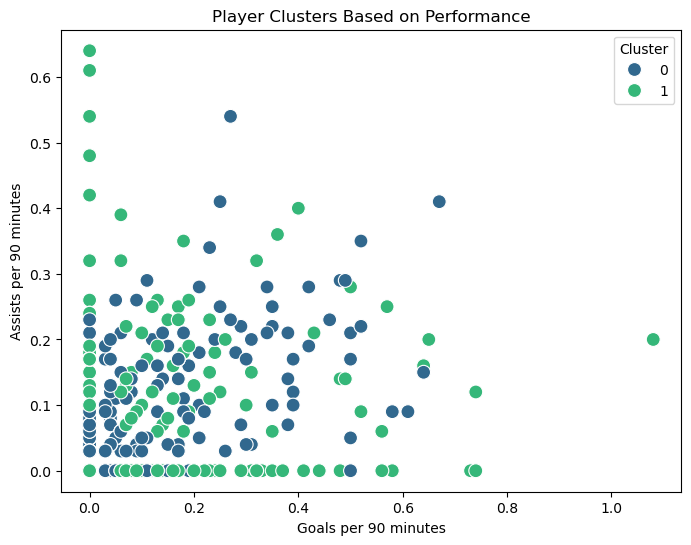

                  Name  Cluster
0          Mason Mount        0
1          Timo Werner        0
2         Ben Chilwell        0
3          Reece James        0
4    César Azpilicueta        0
..                 ...      ...
423        Billy Sharp        1
424           Max Lowe        1
425    Daniel Jebbison        1
426        Lys Mousset        1
427  Antwoine Hackford        1

[428 rows x 2 columns]


In [17]:
#using standard scaler normalize the column *******
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Features for clustering
features = df1[['Age', 'Matches', 'Starts', 'Mins', 'Goals','Assists', 'Passes_Attempted', 'Perc_Passes_Completed','Penalty_Goals', 'Penalty_Attempted',
         'xG', 'xA', 'Yellow_Cards', 'Goals_per_90', 'Assists_per_90', 'xG_Efficiency']]

# Standardize features
scaler = StandardScaler()
#scaled_features = scaler.fit_transform(features)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df1['Cluster'] = kmeans.fit_predict(features)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df1['Goals_per_90'],
    y=df1['Assists_per_90'],
    hue=df1['Cluster'],
    palette='viridis',
    s=100
)
plt.title("Player Clusters Based on Performance")
plt.xlabel("Goals per 90 minutes")
plt.ylabel("Assists per 90 minutes")
plt.legend(title="Cluster")
plt.show()

# Print cluster assignments
print(df1[['Name', 'Cluster']])

In [5]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Example DataFrame with both numerical and categorical data

# Select only numerical columns
numerical_columns = df1.select_dtypes(include=['float64', 'int64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Normalize numerical columns
df1[numerical_columns] = scaler.fit_transform(df1[numerical_columns])

print("DataFrame after normalizing numerical columns:")
print(df1)


DataFrame after normalizing numerical columns:
     Unnamed: 0.1  Unnamed: 0               Name              Club  \
0       -1.728009   -1.702626        Mason Mount           Chelsea   
1       -1.719915   -1.689667        Timo Werner           Chelsea   
2       -1.711821   -1.683188       Ben Chilwell           Chelsea   
3       -1.703728   -1.676709        Reece James           Chelsea   
4       -1.695634   -1.670229  César Azpilicueta           Chelsea   
..            ...         ...                ...               ...   
423      1.695634    1.686064        Billy Sharp  Sheffield United   
424      1.703728    1.692544           Max Lowe  Sheffield United   
425      1.711821    1.705502    Daniel Jebbison  Sheffield United   
426      1.719915    1.711982        Lys Mousset  Sheffield United   
427      1.728009    1.731420  Antwoine Hackford  Sheffield United   

    Nationality Position       Age   Matches    Starts      Mins  ...  \
0           ENG    MF,FW -1.132161  1.3

In [9]:
# Round off all float64 columns to 2 decimal places
df1 = df1.round({col: 2 for col in df1.select_dtypes(include=['float64']).columns})

# Display the first few rows of the updated DataFrame
df1.head()

,Unnamed: 0.1,Unnamed: 0,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,...,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Goals_per_90,Assists_per_90,xG_Efficiency
0,-1.73,-1.70,Mason Mount,Chelsea,ENG,"MF,FW",-1.13,1.36,1.33,1.39,...,0.40,0.81,0.66,0.45,1.86,-0.22,-0.33,0.41,0.71,0.63
1,-1.72,-1.69,Timo Werner,Chelsea,GER,FW,-0.38,1.27,1.05,1.09,...,-0.28,-0.25,-0.27,1.76,1.50,-0.22,-0.33,0.53,1.83,-0.09
2,-1.71,-1.68,Ben Chilwell,Chelsea,ENG,DF,-0.63,0.49,0.87,0.76,...,-0.09,-0.25,-0.27,-0.27,0.30,0.21,-0.33,-0.01,1.08,0.70
3,-1.70,-1.68,Reece James,Chelsea,ENG,DF,-1.38,0.98,0.69,0.85,...,0.77,-0.25,-0.27,-0.53,0.42,0.21,-0.33,-0.50,-0.03,0.02
4,-1.70,-1.67,César Azpilicueta,Chelsea,ESP,DF,1.12,0.40,0.60,0.65,...,1.10,-0.25,-0.27,-0.73,0.30,1.07,2.85,-0.50,-0.03,0.87


In [11]:
df1.to_csv("newdata3.csv",index=False)

In [1]:
# Import Librarirs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(r"/Users/shanes/Desktop/Research/Data-Analysis-Football-Project-Using-Python-main/Jupyter Notebook - Input Output Source File/newdata3.csv")
df

,Unnamed: 0.1,Unnamed: 0,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,...,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Goals_per_90,Assists_per_90,xG_Efficiency
0,-1.73,-1.70,Mason Mount,Chelsea,ENG,"MF,FW",-1.13,1.36,1.33,1.39,...,0.40,0.81,0.66,0.45,1.86,-0.22,-0.33,0.41,0.71,0.63
1,-1.72,-1.69,Timo Werner,Chelsea,GER,FW,-0.38,1.27,1.05,1.09,...,-0.28,-0.25,-0.27,1.76,1.50,-0.22,-0.33,0.53,1.83,-0.09
2,-1.71,-1.68,Ben Chilwell,Chelsea,ENG,DF,-0.63,0.49,0.87,0.76,...,-0.09,-0.25,-0.27,-0.27,0.30,0.21,-0.33,-0.01,1.08,0.70
3,-1.70,-1.68,Reece James,Chelsea,ENG,DF,-1.38,0.98,0.69,0.85,...,0.77,-0.25,-0.27,-0.53,0.42,0.21,-0.33,-0.50,-0.03,0.02
4,-1.70,-1.67,César Azpilicueta,Chelsea,ESP,DF,1.12,0.40,0.60,0.65,...,1.10,-0.25,-0.27,-0.73,0.30,1.07,2.85,-0.50,-0.03,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,1.70,1.69,Billy Sharp,Sheffield United,ENG,FW,2.13,-0.57,-0.96,-0.88,...,-1.26,1.87,1.58,1.24,-0.18,-0.65,-0.33,1.50,-0.77,-0.37
424,1.70,1.69,Max Lowe,Sheffield United,ENG,DF,-0.63,-1.35,-0.96,-1.07,...,-1.91,-0.25,-0.27,-0.86,-0.66,-0.65,-0.33,-0.74,-0.77,-0.84
425,1.71,1.71,Daniel Jebbison,Sheffield United,ENG,FW,-2.13,-1.74,-1.32,-1.35,...,-1.16,-0.25,-0.27,2.35,-0.90,-1.08,-0.33,1.20,-0.77,-0.74
426,1.72,1.71,Lys Mousset,Sheffield United,FRA,"FW,MF",-0.38,-1.06,-1.41,-1.34,...,0.10,-0.25,-0.27,0.52,0.18,-1.08,-0.33,-0.74,-0.77,-0.84


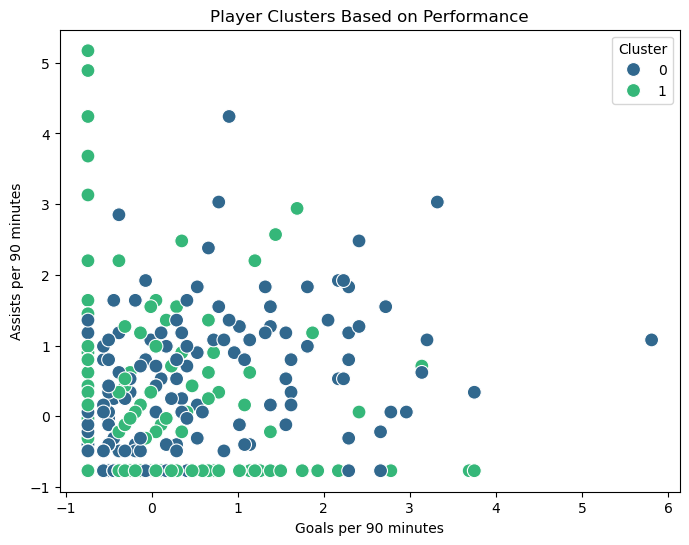

                  Name  Cluster
0          Mason Mount        0
1          Timo Werner        0
2         Ben Chilwell        0
3          Reece James        0
4    César Azpilicueta        0
..                 ...      ...
423        Billy Sharp        1
424           Max Lowe        1
425    Daniel Jebbison        1
426        Lys Mousset        1
427  Antwoine Hackford        1

[428 rows x 2 columns]


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Features for clustering
features = df[['Age', 'Matches', 'Starts', 'Mins', 'Goals','Assists', 'Passes_Attempted', 'Perc_Passes_Completed','Penalty_Goals', 'Penalty_Attempted',
         'xG', 'xA', 'Yellow_Cards', 'Goals_per_90', 'Assists_per_90', 'xG_Efficiency']]

# Standardize features
scaler = StandardScaler()
#scaled_features = scaler.fit_transform(features)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df['Goals_per_90'],
    y=df['Assists_per_90'],
    hue=df['Cluster'],
    palette='viridis',
    s=100
)
plt.title("Player Clusters Based on Performance")
plt.xlabel("Goals per 90 minutes")
plt.ylabel("Assists per 90 minutes")
plt.legend(title="Cluster")
plt.show()

# Print cluster assignments
print(df[['Name', 'Cluster']])


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Example dataset with player types
#df1['Type'] = ['Striker', 'Striker', 'Midfielder', 'Striker']  # Example labels

# Define features and target
X = df[['Age', 'Matches', 'Starts', 'Mins', 'Goals','Assists', 'Passes_Attempted', 'Perc_Passes_Completed','Penalty_Goals', 
        'Penalty_Attempted','xG', 'xA', 'Yellow_Cards', 'Goals_per_90', 'Assists_per_90', 'xG_Efficiency']]
y = df['Position']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          DF       0.64      0.92      0.75        25
       DF,MF       0.00      0.00      0.00         2
          FW       0.73      0.79      0.76        14
       FW,DF       0.00      0.00      0.00         3
       FW,MF       0.27      0.75      0.40         4
          MF       0.45      0.43      0.44        21
       MF,DF       0.00      0.00      0.00         6
       MF,FW       0.00      0.00      0.00        11

    accuracy                           0.53        86
   macro avg       0.26      0.36      0.29        86
weighted avg       0.43      0.53      0.47        86



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
from sklearn.svm import SVC  # Import the Support Vector Classifier
from sklearn.metrics import classification_report  # For evaluation

# Initialize the SVM classifier
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Print classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          DF       0.67      0.80      0.73        25
       DF,MF       0.00      0.00      0.00         2
          FW       0.75      0.86      0.80        14
       FW,DF       0.00      0.00      0.00         3
       FW,MF       0.23      0.75      0.35         4
          MF       0.52      0.62      0.57        21
       MF,DF       0.00      0.00      0.00         6
       MF,FW       0.00      0.00      0.00        11

    accuracy                           0.56        86
   macro avg       0.27      0.38      0.31        86
weighted avg       0.45      0.56      0.50        86



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Cluster labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -

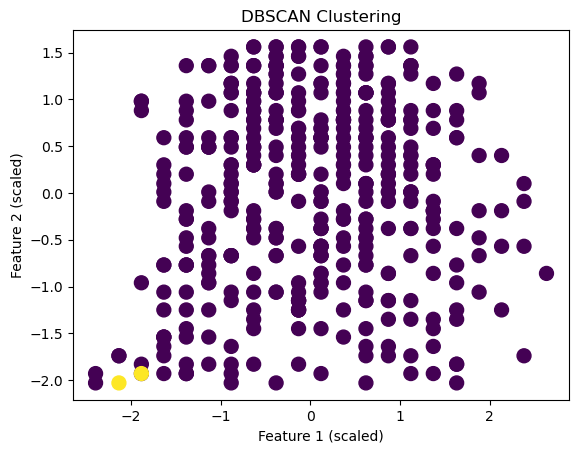

In [11]:
#dbscan 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Standardize features for better performance (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Initialize DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)  # Adjust eps and min_samples based on your data

# Fit the model
dbscan.fit(X_scaled)

# Get cluster labels
labels = dbscan.labels_

# Print cluster labels (-1 indicates noise/outliers)
print("Cluster labels:", labels)

# Visualize clusters (for 2D data only)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=100)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

# Select numerical columns (excluding unnamed columns)
numerical_columns = [col for col in df.columns if df[col].dtype in ['float64'] and "Unnamed" not in col]

# Encode the 'Position' column
label_encoder = LabelEncoder()
df['Position_encoded'] = label_encoder.fit_transform(df['Position'])

# Prepare the feature matrix and target vector
X = df[numerical_columns]
y = df['Position_encoded']

# Display the numerical columns and the unique positions for reference
numerical_columns, label_encoder.classes_


(['Age',
  'Matches',
  'Starts',
  'Mins',
  'Goals',
  'Assists',
  'Passes_Attempted',
  'Perc_Passes_Completed',
  'Penalty_Goals',
  'Penalty_Attempted',
  'xG',
  'xA',
  'Yellow_Cards',
  'Red_Cards',
  'Goals_per_90',
  'Assists_per_90',
  'xG_Efficiency'],
 array(['DF', 'DF,FW', 'DF,MF', 'FW', 'FW,DF', 'FW,MF', 'GK', 'MF',
        'MF,DF', 'MF,FW'], dtype=object))

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [63]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Initialize the XGBoost model
xgb = XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_), random_state=42)

# Train the model
xgb.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb.predict(X_test)
#print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


In [69]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set using the tuned model from RandomizedSearchCV
y_pred = xgb.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.2f}")

# Detailed classification report
#print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Test Set Accuracy: 0.54


In [19]:
print("Classes in Training Set:", set(y_train))
print("Classes in Test Set:", set(y_test))
print("All Classes:", set(range(len(label_encoder.classes_))))


Classes in Training Set: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Classes in Test Set: {0, 2, 3, 4, 5, 7, 8, 9}
All Classes: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [ ]:
#hyper parameter tuning

In [7]:
pip install tensorflow

  Using cached tensorflow-2.18.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (4.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.68.1-cp312-cp312-macosx_10_9_universal2.whl.metadata (3.9 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-macosx_10_9_universal2.whl.metadata (20 kB)
  Using cached namex-0.0.8-py3-none-any.whl.met

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the ANN architecture
model = Sequential([
    Dense(64, input_dim=X.shape[1], activation='relu'),  # Input layer
    Dropout(0.3),  # Regularization
    Dense(32, activation='relu'),  # Hidden layer
    Dropout(0.3),  # Regularization
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)


Epoch 1/50
8/8 - 0s - 41ms/step - accuracy: 0.1339 - loss: 2.3373 - val_accuracy: 0.2333 - val_loss: 2.1220
Epoch 2/50
8/8 - 0s - 3ms/step - accuracy: 0.2176 - loss: 2.2229 - val_accuracy: 0.3833 - val_loss: 2.0272
Epoch 3/50
8/8 - 0s - 3ms/step - accuracy: 0.2636 - loss: 2.1165 - val_accuracy: 0.4167 - val_loss: 1.9450
Epoch 4/50
8/8 - 0s - 3ms/step - accuracy: 0.3724 - loss: 1.9467 - val_accuracy: 0.4500 - val_loss: 1.8599
Epoch 5/50
8/8 - 0s - 3ms/step - accuracy: 0.4184 - loss: 1.8434 - val_accuracy: 0.4500 - val_loss: 1.7841
Epoch 6/50
8/8 - 0s - 3ms/step - accuracy: 0.4142 - loss: 1.7798 - val_accuracy: 0.4500 - val_loss: 1.7175
Epoch 7/50
8/8 - 0s - 3ms/step - accuracy: 0.4561 - loss: 1.7521 - val_accuracy: 0.4667 - val_loss: 1.6640
Epoch 8/50
8/8 - 0s - 3ms/step - accuracy: 0.4519 - loss: 1.6485 - val_accuracy: 0.4500 - val_loss: 1.6215
Epoch 9/50
8/8 - 0s - 3ms/step - accuracy: 0.4895 - loss: 1.5729 - val_accuracy: 0.4500 - val_loss: 1.5841
Epoch 10/50
8/8 - 0s - 3ms/step - ac

In [35]:
from sklearn.metrics import classification_report
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predict and generate classification report
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1)



Test Accuracy: 0.49
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [19]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [29]:
from kerastuner.tuners import RandomSearch
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

def build_model(hp):
    model = Sequential()
    # Input layer and first hidden layer
    model.add(Dense(hp.Int('units_1', min_value=32, max_value=128, step=32), 
                    activation='relu', input_dim=X.shape[1]))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))

    # Second hidden layer
    model.add(Dense(hp.Int('units_2', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))

    # Compile the model
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


/var/folders/18/dpnmnwsj0nz74sltb7rw_9380000gn/T/ipykernel_31043/2101233899.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [31]:
from kerastuner.tuners import RandomSearch

# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',  # Optimize for validation accuracy
    max_trials=20,             # Number of hyperparameter combinations to try
    executions_per_trial=2,    # Number of models to train per trial
    directory='tuner_results', # Directory to save results
    project_name='ann_tuning'
)


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32, verbose=2)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps.values}")


Trial 20 Complete [00h 00m 04s]
val_accuracy: 0.6166666746139526

Best val_accuracy So Far: 0.6666666567325592
Total elapsed time: 00h 01m 09s
Best Hyperparameters: {'units_1': 64, 'dropout_1': 0.4, 'units_2': 64, 'dropout_2': 0.1, 'optimizer': 'rmsprop'}


In [15]:
#silhouette score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Perform clustering
kmeans = KMeans(n_clusters=len(label_encoder.classes_), random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Compute silhouette score
score = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.14
